In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
cols = [col_name.lower().replace(' ', '_') for col_name in data.columns]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [4]:
data.columns = cols
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
data = data.drop(['customer'], axis = 1) 
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
num = data.select_dtypes(include=np.number)
cat = data.select_dtypes(include=np.object)

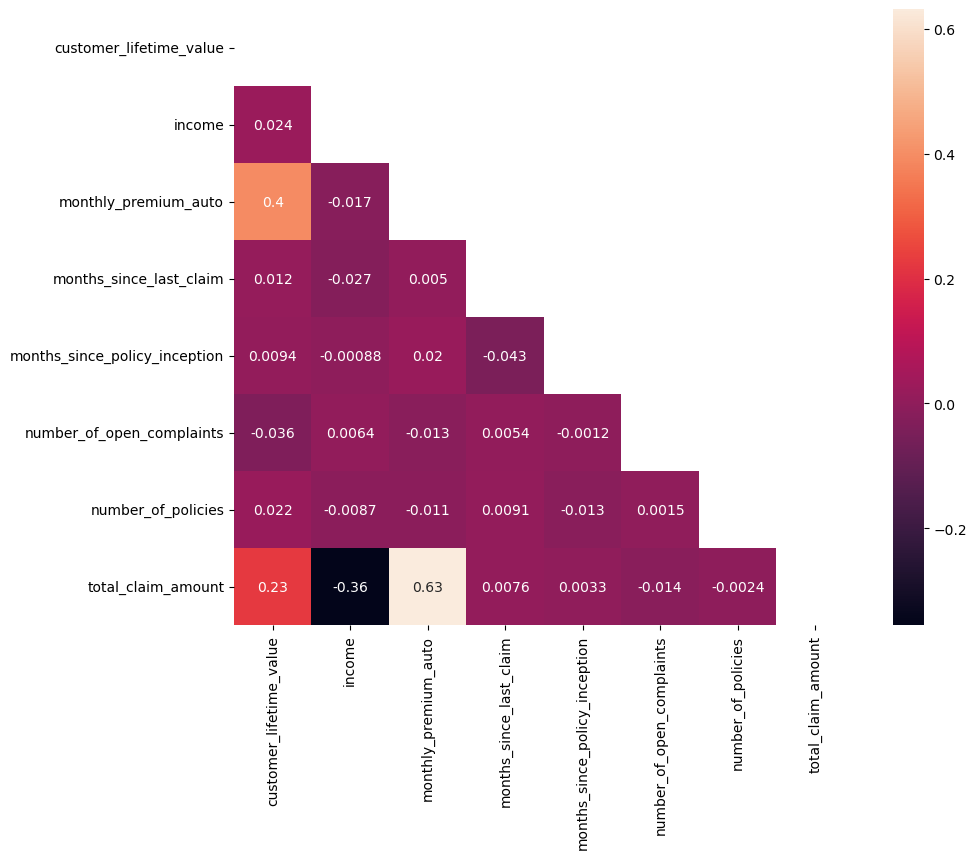

In [7]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # to hiding repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)

In [8]:
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X_num = num.drop(['total_claim_amount'], axis=1)
X_cat = cat

X_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [10]:
transformer = StandardScaler().fit(X_num)
X_stand = transformer.transform(X_num)

In [11]:
X_num_stand = pd.DataFrame(X_stand, columns=X_num.columns)
X_num_stand.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


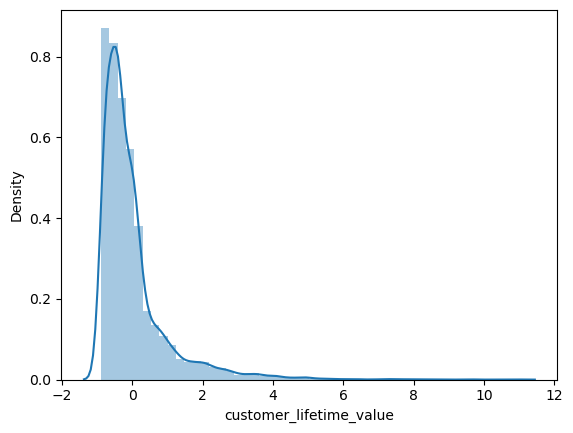

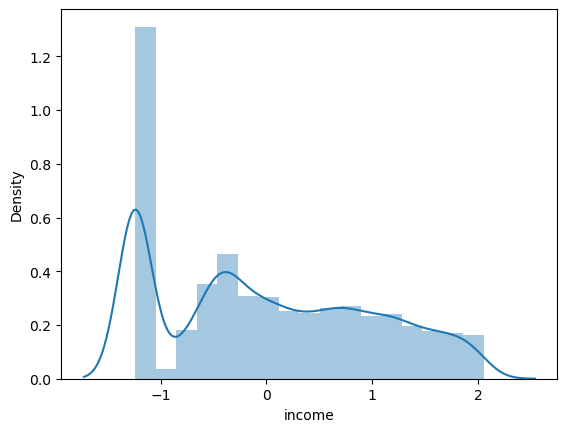

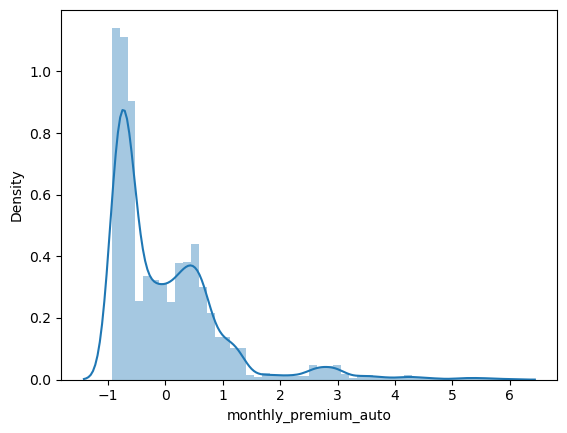

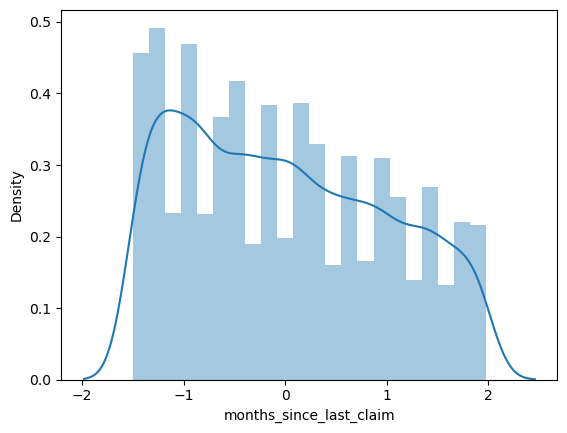

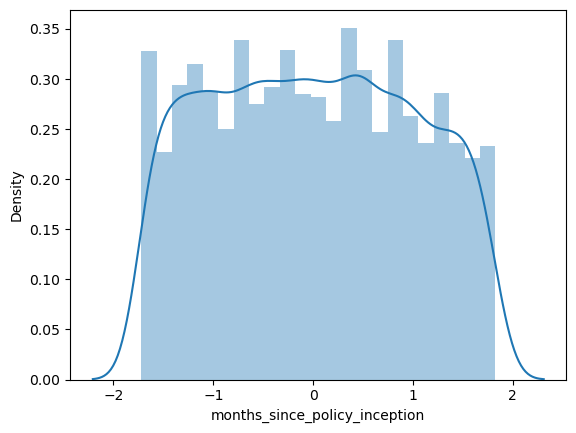

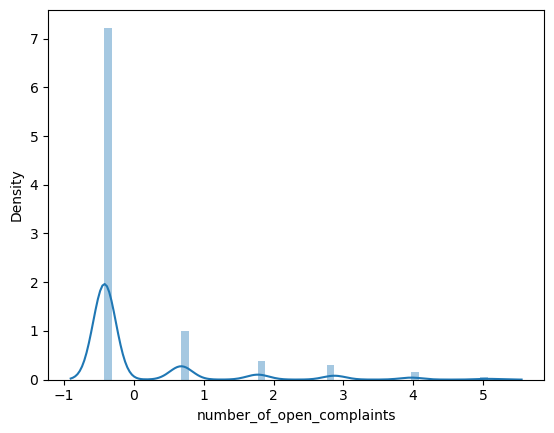

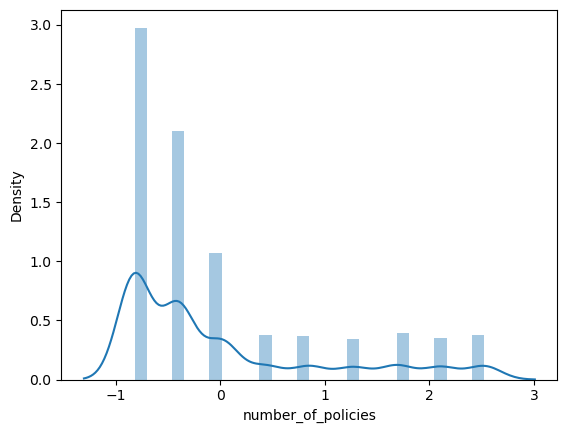

In [12]:
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

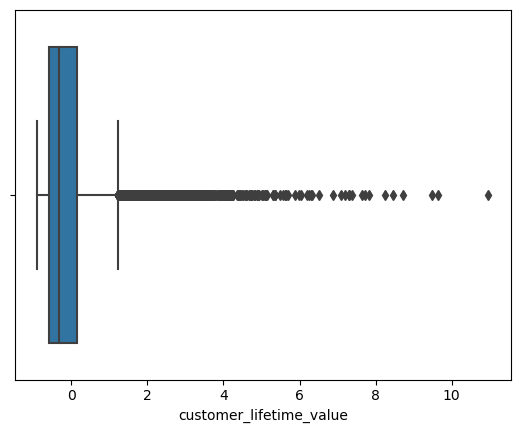

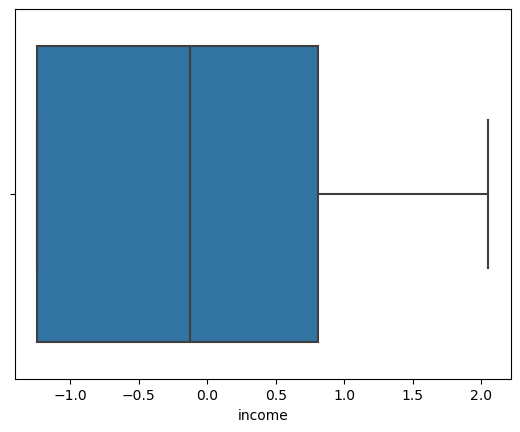

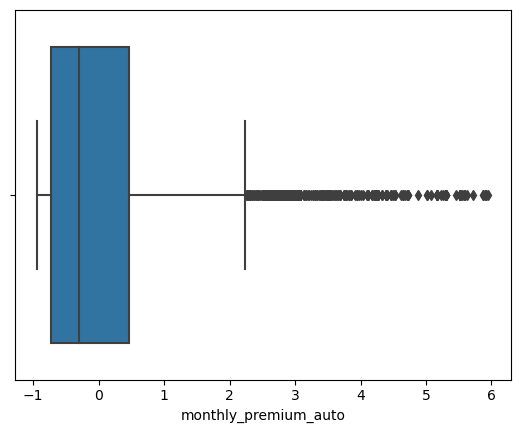

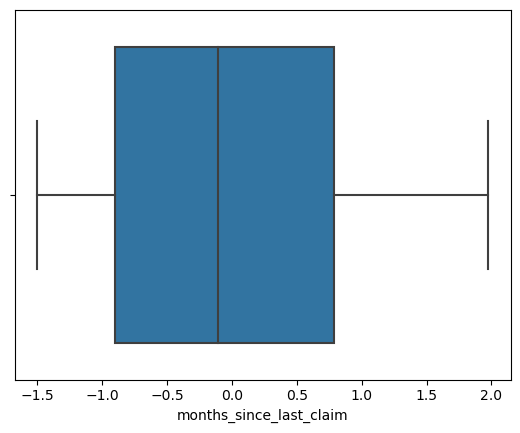

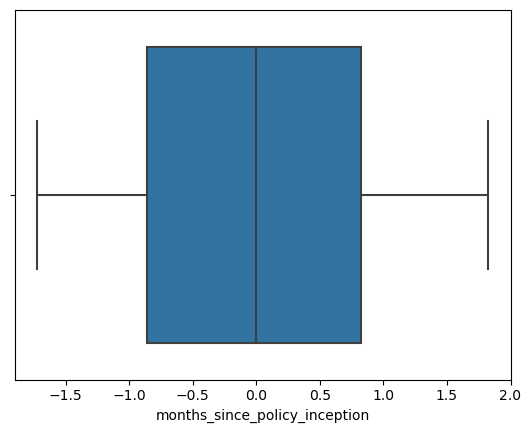

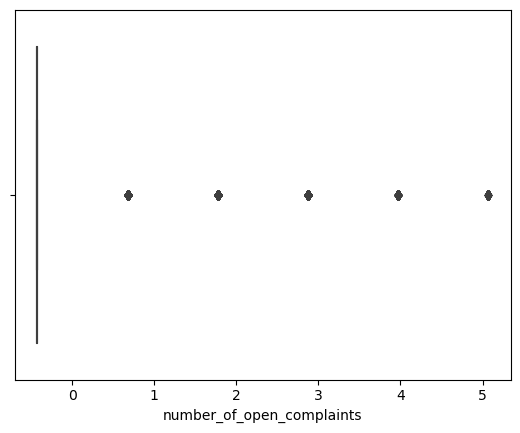

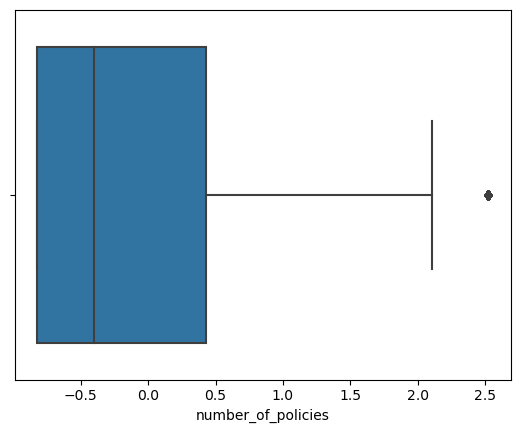

In [13]:
for column in X_num_stand.columns:
    sns.boxplot(x=X_num_stand[column] ,whis=1.5)
    plt.show()

# to deal with: customer_lifetime_value, monthly_premium_auto, number_of_policies
# to encode: number_of_open_complaints

<AxesSubplot:xlabel='customer_lifetime_value'>

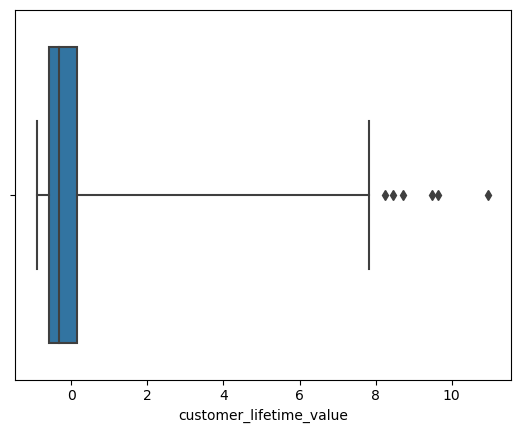

In [14]:
# removing outliers

sns.boxplot(x=X_num_stand['customer_lifetime_value'], whis=11)

In [15]:
# any removals will have to be reflected in the entirety of the set, not only in X_num_stand or X
# so I will apply my changes to the entire dataset after I find out what they should be, then redefine the subsets, in order to avoid errors due to incosistency in the data 

In [16]:

iqr1 = np.percentile(X_num_stand['customer_lifetime_value'],75) - np.percentile(X_num_stand['customer_lifetime_value'],25)
iqr1

0.7230695149256969

In [17]:
upper_limit1 = np.percentile(X_num_stand['customer_lifetime_value'],75) + 11*iqr1
lower_limit1 = np.percentile(X_num_stand['customer_lifetime_value'],25) - 11*iqr1
upper_limit1, lower_limit1

(8.093086958249515, -8.537511885041512)

In [18]:
X_num_stand = X_num_stand[(X_num_stand['customer_lifetime_value']>lower_limit1) & (X_num_stand['customer_lifetime_value']<upper_limit1)]
X_num_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


<AxesSubplot:xlabel='monthly_premium_auto'>

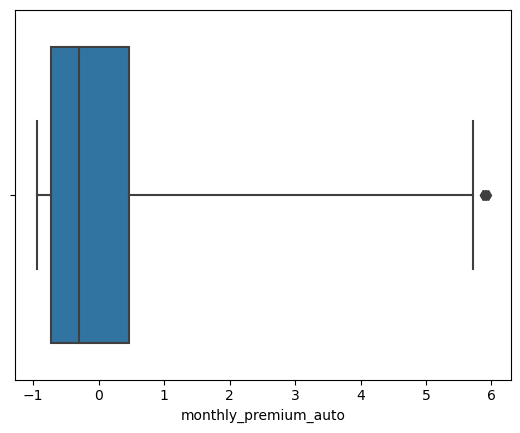

In [19]:
#monthly_premium_auto

sns.boxplot(x=X_num_stand['monthly_premium_auto'], whis=4.5)

In [20]:
iqr2 = np.percentile(X_num_stand['monthly_premium_auto'],75) - np.percentile(X_num_stand['monthly_premium_auto'],25)
iqr2

1.1916497159797104

In [21]:
upper_limit2 = np.percentile(X_num_stand['monthly_premium_auto'],75) + 4.5*iqr2
lower_limit2 = np.percentile(X_num_stand['monthly_premium_auto'],25) - 4.5*iqr2
upper_limit2, lower_limit2

(5.821084158954501, -6.095413000842603)

In [22]:
X_num_stand = X_num_stand[(X_num_stand['monthly_premium_auto']>lower_limit2) & (X_num_stand['monthly_premium_auto']<upper_limit2)]
X_num_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


<AxesSubplot:xlabel='number_of_policies'>

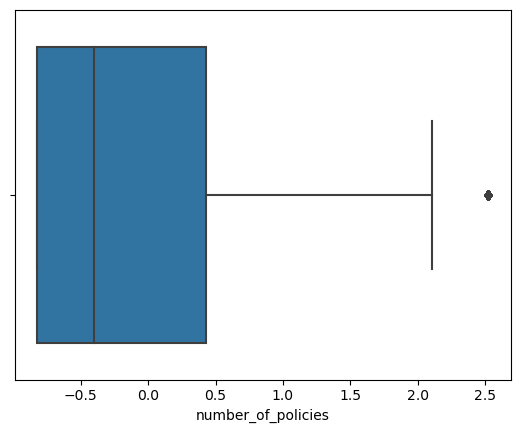

In [23]:
#number_of_policies

sns.boxplot(x=X_num_stand['number_of_policies'], whis=1.5)

In [24]:
iqr3 = np.percentile(X_num_stand['number_of_policies'],75) - np.percentile(X_num_stand['number_of_policies'],25)
iqr3

1.2552033585471871

In [25]:
upper_limit3 = np.percentile(X_num_stand['number_of_policies'],75) + 1.5*iqr3
lower_limit3 = np.percentile(X_num_stand['number_of_policies'],25) - 1.5*iqr3
upper_limit3, lower_limit3

(2.3153605197111933, -2.705452914477555)

In [26]:
#X_num_stand = X_num_stand[(X_num_stand['number_of_policies']>lower_limit) & (X_num_stand['number_of_policies']<upper_limit)]
#X_num_stand

*too many rows were removed, which means many outliers share the same of a very close value in the boxplot. I will change the whiskers of number of policy's and see if I need to remove any more rows again

<AxesSubplot:xlabel='number_of_policies'>

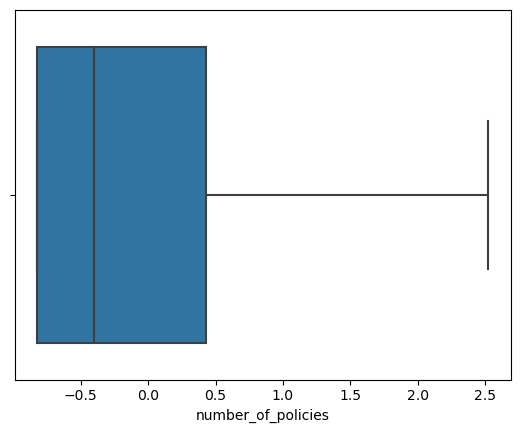

In [27]:
sns.boxplot(x=X_num_stand['number_of_policies'], whis=2)

I will check out how the number of open complaints' distribution would look like if I turned the variabled's values into 0 for non-existence of complaints or 1 for their existence

In [28]:
X_num['number_of_open_complaints'].unique()
X_num['number_of_open_complaints'] = X_num['number_of_open_complaints'].apply(lambda x: str(x))
X_num['number_of_open_complaints'] = (X_num['number_of_open_complaints'].str.replace('2', '1')
                                                        .replace('3', '1')
                                                        .replace('4', '1')
                                                        .replace('5', '1'))
X_num['number_of_open_complaints'] = X_num['number_of_open_complaints'].apply(lambda x: int(x))

<AxesSubplot:xlabel='number_of_open_complaints'>

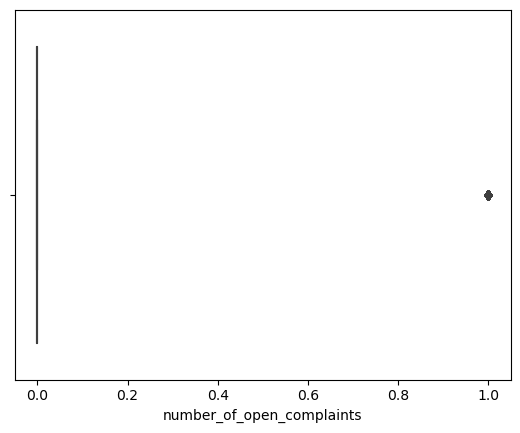

In [29]:
sns.boxplot(x=X_num['number_of_open_complaints'], whis=1.5)

it seems that I could just drop the column alltogether

In [30]:
X_num_stand = X_num_stand.drop(['number_of_open_complaints'], axis =1)


In [31]:
X_cat = X_cat.drop(['effective_to_date'], axis=1)

In [32]:
X_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [33]:
iqr1 = np.percentile(X['customer_lifetime_value'],75) - np.percentile(X['customer_lifetime_value'],25)
iqr1

4967.915247000001

In [34]:
upper_limit1 = np.percentile(X['customer_lifetime_value'],75) + 11*iqr1
lower_limit1 = np.percentile(X['customer_lifetime_value'],25) - 11*iqr1
upper_limit1, lower_limit1

(63609.234758250015, -50652.815922750015)

In [35]:
X = X[(X['customer_lifetime_value']>lower_limit1) & (X['customer_lifetime_value']<upper_limit1)]
X

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [36]:
iqr2 = np.percentile(X['monthly_premium_auto'],75) - np.percentile(X['monthly_premium_auto'],25)
iqr2


41.0

In [37]:
upper_limit2 = np.percentile(X['monthly_premium_auto'],75) + 4.5*iqr2
lower_limit2 = np.percentile(X['monthly_premium_auto'],25) - 4.5*iqr2
upper_limit2, lower_limit2


(293.5, -116.5)

In [38]:
X = X[(X['monthly_premium_auto']>lower_limit2) & (X['monthly_premium_auto']<upper_limit2)]
X

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [39]:
data_new = data[(data['customer_lifetime_value']>lower_limit1) & (data['customer_lifetime_value']<upper_limit1)]
data_new = data_new[(data_new['monthly_premium_auto']>lower_limit2) & (data_new['monthly_premium_auto']<upper_limit2)]
data_new



,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [40]:
y = data_new["total_claim_amount"]
X = data_new.drop(['number_of_open_complaints','effective_to_date', ],axis=1)

X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)
X.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [41]:
for column in X_cat.columns:
    print(column)
    print(X_cat[column].unique())

state
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response
['No' 'Yes']
coverage
['Basic' 'Extended' 'Premium']
education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender
['F' 'M']
location_code
['Suburban' 'Rural' 'Urban']
marital_status
['Married' 'Single' 'Divorced']
policy_type
['Corporate Auto' 'Personal Auto' 'Special Auto']
policy
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type
['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel
['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size
['Medsize' 'Small' 'Large']


In [42]:
# Now that that is known, I will start encoding them
# state
# I will group the states as northwest = Washington, Oregon = nw and southwest = Arizona, California, Nevada = sw

X_cat['state'] = X_cat['state'].apply(lambda x: str(x))
X_cat['state'] = (X_cat['state'].str.replace('Washington', 'nw')
                                    .replace('Oregon', 'nw')
                                    .replace('Arizona', 'sw')
                                    .replace('California', 'sw')
                                    .replace('Nevada','sw'))


In [43]:
# response only has 2 unique values and will be thus easy to encode
# coverage has 3 values, thus I will follow the same method as Xisca
# education: I will group the values as above highschool = ah or highschool or below = hb

X_cat['education'] = X_cat['education'].apply(lambda x: str(x))
X_cat['education'] = (X_cat['education'].str.replace('Bachelor', 'ah')
                                            .replace('College', 'ah')
                                            .replace('Master', 'ah')
                                            .replace('Doctor', 'ah')
                                            .replace('High School or Below','bh'))

In [44]:
# employmentstatus: I will use labels in this case as I can not create a simpler system of reference

X_cat['employmentstatus'] = X_cat['employmentstatus'].apply(lambda x: str(x))
X_cat['employmentstatus'] = (X_cat['employmentstatus'].str.replace('Employed', '1')
                                                        .replace('Unemployed', '2')
                                                        .replace('Medical Leave', '3')
                                                        .replace('Disabled', '4')
                                                        .replace('Retired', '5'))
X_cat['employmentstatus'] = X_cat['employmentstatus'].apply(lambda x: int(x))

In [45]:
##policy: decrease number of columns to 3
# 1 = Corporate L1, Corporate L2, Corporate L3
# 2 = Personal L1, Personal L2, Personal L3
# 3 = Special L1, Special L2, Special L3
# , then like xisca

X_cat['policy'] = X_cat['policy'].apply(lambda x: str(x))
X_cat['policy'] = (X_cat['policy'].str.replace('Corporate L1', 'Corporate')
                                        .replace('Corporate L2', 'Corporate')
                                        .replace('Corporate L3', 'Corporate')
                                        .replace('Personal L1', 'Personal')
                                        .replace('Personal L2', 'Personal')
                                        .replace('Personal L3', 'Personal')
                                        .replace('Special L1', 'Special')
                                        .replace('Special L2', 'Special')
                                        .replace('Special L3', 'Special'))

In [46]:
#renew offer type: labels ['Offer1' 'Offer3' 'Offer2' 'Offer4']

X_cat['renew_offer_type'] = X_cat['renew_offer_type'].apply(lambda x: str(x))
X_cat['renew_offer_type'] = (X_cat['renew_offer_type'].str.replace('Offer1', '1')
                                                        .replace('Offer2', '2')
                                                        .replace('Offer3', '3')
                                                        .replace('Offer4', '4'))
X_cat['renew_offer_type'] = X_cat['renew_offer_type'].apply(lambda x: int(x))

In [47]:
#sales channel: labels

X_cat['sales_channel'] = X_cat['sales_channel'].apply(lambda x: str(x))
X_cat['sales_channel'] = (X_cat['sales_channel'].str.replace('Agent', '1')
                                                        .replace('Call Center', '2')
                                                        .replace('Web', '3')
                                                        .replace('Branch', '4'))
X_cat['sales_channel'] = X_cat['sales_channel'].apply(lambda x: int(x))

In [48]:
#vehicle class: labels

X_cat['vehicle_class'] = X_cat['vehicle_class'].apply(lambda x: str(x))                                                        
X_cat['vehicle_class'] = (X_cat['vehicle_class'].str.replace('Two-Door Car', '1')                                                        
                                                        .replace('Four-Door Car', '2')
                                                        .replace('SUV', '3')
                                                        .replace('Luxury SUV', '4')
                                                        .replace('Luxury Car', '4') #decrease number of columns
                                                        .replace('Sports Car', '5'))
X_cat['vehicle_class'] = X_cat['vehicle_class'].apply(lambda x: int(x))

In [49]:
Xnothot = X_cat[['employmentstatus', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
Xnothot = Xnothot.reset_index(drop=True)

In [50]:
Xhot = X_cat[['state', 'response', 'coverage', 'education', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'vehicle_size']]
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(Xhot)

#state

{'nw': [1,0],
'sw': [0,0]}

# response only has 2 unique values and will be thus easy to encode

{'Yes': [1,0],
'No': [0,0]}

# coverage has 3 values, thus I will follow the same method as Xisca

{'Basic': [1,0],
'Extended': [0,0],
'Premium': [0,1]}

#education

{'ah': [1,0],
'hb': [0,0]}

#gender tick

{'M': [1,0],
'F': [0,0]}

#location: like xisca

{'Suburban': [1,0],
'Rural': [0,0],
'Urban': [0,1]}

#marital: like xisca

{'Married': [1,0],
'Single': [0,0],
'Divorced': [0,1]}

#policy_type: same

{'Corporate Auto': [1,0],
'Personal Auto': [0,0],
'Special Auto': [0,1]}

#policy

{'Corporate': [1,0],
'Personal': [0,0],
'Special': [0,1]}

#vehicle size: like xisca

{'Medsize': [1,0],
'Small': [0,0],
'Large': [0,1]}

encoded = encoder.transform(Xhot).toarray() 
cat_enc1 = pd.DataFrame(encoded)
#encoder.categories_
#cat_encoded.columns = encoder.categories_[0][1:] A more complicated way of assigning the column names
cat_enc1.columns = ['state_nw', 'response_yes','cov_basic', 'cov_premium', 'edu_ab_high', 'gender_m', 'suburban', 'urban', 'married', 'divorced', 'corporate_auto', 'special_auto', 'policy_corp', 'policy_special', 'veh_size_medsize', 'veh_size_large']
cat_enc1

,state_nw,response_yes,cov_basic,cov_premium,edu_ab_high,gender_m,suburban,urban,married,divorced,corporate_auto,special_auto,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9120,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [51]:
cat_enc1 = cat_enc1.drop(['corporate_auto', 'special_auto'], axis=1)
cat_enc2 = pd.concat([Xnothot, cat_enc1], axis=1)
cat_enc2

,employmentstatus,renew_offer_type,sales_channel,vehicle_class,state_nw,response_yes,cov_basic,cov_premium,edu_ab_high,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,3,1,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2,1,2,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,1,2,3,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,1,1,4,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,2,1,4,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9120,1,3,4,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


I am going to first concatenate the datasets and then train the model and run predictions

In [52]:
X_num_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648
...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154


In [57]:
X_num_stand = X_num_stand.reset_index(drop=True)
X_num_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648
...,...,...,...,...,...,...
9117,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247
9118,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648
9119,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247
9120,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154


In [58]:
cat_enc2 = cat_enc2.reset_index(drop=True)
cat_enc2


,employmentstatus,renew_offer_type,sales_channel,vehicle_class,state_nw,response_yes,cov_basic,cov_premium,edu_ab_high,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,3,1,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2,1,2,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,1,2,3,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,1,1,4,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,2,1,4,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9120,1,3,4,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [59]:
y = y.reset_index(drop = True)
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9117     198.234764
9118     379.200000
9119     790.784983
9120     691.200000
9121     369.600000
Name: total_claim_amount, Length: 9122, dtype: float64

In [61]:
X_en = pd.concat([X_num_stand, cat_enc2, y])
X_en

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employmentstatus,renew_offer_type,sales_channel,vehicle_class,...,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large,0
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.234764
9118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.200000
9119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,790.784983
9120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691.200000


In [ ]:
### even after resetting the indexes I can not concat successfully. I can not move on to training and predictions until I solve this